In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

### Paragraph 1

Example 1: average 

$$
\bar{t} = \frac{\sum_{i=1}^n t_i}{n}
$$

In [10]:
t = [6.9, 6.7, 7, 7.2, 6.8]


In [14]:
t_np = np.array(t)
np.mean(t_np)

np.float64(6.92)

In [13]:
mean_value = statistics.mean(t)
mean_value

6.92

Example 2:
weighted average
$$
\bar{x} = \frac{\sum_{i=1}^n x_i N_i }{\sum_{i=1}^n N_i}
$$

In [16]:
x = np.array([2, 3, 4, 5])
N = np.array([5, 10, 7, 3])

weighted_mean = np.sum(x * N) / np.sum(N)
print(weighted_mean)


3.32


In [17]:
np.average(x, weights=N)

np.float64(3.32)

In [18]:
x = [2, 3, 4, 5]
N = [5, 10, 7, 3]

weighted_mean = sum(x_i * n_i for x_i, n_i in zip(x, N)) / sum(N)
print(weighted_mean)

3.32


Example 3.1

In [21]:
potato = np.array([147, 145, 155])
np.mean(potato)

np.float64(149.0)

Example 3.2

| Area | Square | Profit |
|:-----|:-----: |-----:|
| A    | 139.8  | 147  |
| B    | 102.34 | 145  |
| C    | 63.29  | 155  |


In [25]:
data = {
    "area": ["A", "B", "C"],
    "square": [139.8, 102.34, 63.29],
    "profit": [147, 145, 155]
}

df = pd.DataFrame(data)
weighted_avg = (df["profit"] * df["square"]).sum() / df["square"].sum()
print(weighted_avg)


147.98759126477427


### Paragraph 2

$$
W_i = \frac{N_i}{N}
$$

$$
w_i = \frac{n_i}{n}
$$

$$
n = n_1 + n_2 + ... + n_k
$$

$$
w_1 + w_2 + ... + w_k = 1
$$

In [30]:
x_i = np.array([2, 3, 4, 5])
n_i = np.array([5, 10, 7, 3])
n = sum(n_i)

In [32]:
freq = n_i / n 
freq

array([0.2 , 0.4 , 0.28, 0.12])

Example 4

In [88]:
# raw data to dictionary

data = [4, 5, 6, 4, 4, 2, 3, 5, 4, 4, 5, 2, 3, 3, 4, 5, 5, 2, 3, 6, 5, 4, 6, 4, 3]

dict_data = {}

for elem in data:
    if not elem in dict_data.keys():
        dict_data[elem] = 1
    else:
        dict_data[elem] += 1

pd_data = {
    "x": [],
    "n": []
}

for k in dict_data.keys():
    pd_data['x'].append(k)
    pd_data['n'].append(dict_data[k])


df = pd.DataFrame(pd_data).sort_values('x')

In [89]:
df

,x,n
3,2,3
4,3,5
0,4,8
1,5,6
2,6,3


In [138]:
# raw data directly to pandas 

data = [4, 5, 6, 4, 4, 2, 3, 5, 4, 4, 5, 2, 3, 3, 4, 5, 5, 2, 3, 6, 5, 4, 6, 4, 3]
df = pd.DataFrame(data, columns=['value'])
df_freq = df.groupby('value').agg(
        frequency=('value', 'count')
    ).reset_index()

df_freq['relative_frequency'] = df_freq['frequency'] / len(data)

In [139]:
df_freq

,value,frequency,relative_frequency
0,2,3,0.12
1,3,5,0.20
2,4,8,0.32
3,5,6,0.24
4,6,3,0.12


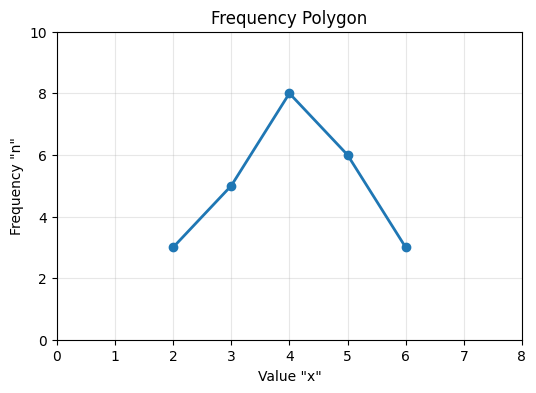

In [140]:
plt.figure(figsize=(6,4))
plt.plot(df_freq.value, df_freq.frequency, marker='o', linewidth=2)
plt.grid(True, alpha=0.3)

plt.xlabel('Value "x"')
plt.ylabel('Frequency "n"')
plt.title('Frequency Polygon')

plt.ylim([0, max(df_freq.frequency)+2])
plt.xlim([0, max(df_freq.value)+2])
plt.show()

In [141]:
#sum check
print(df_freq.frequency.sum())
print(df_freq.relative_frequency.sum())

25
1.0


Empirical Distribution Function

$$
F(x) = \frac{n_x}{n},
$$

n_x - number of values less than x

$$
x \in \left(-\infty;2 \right] :  F(x) = 0
$$

$$
x \in \left(2; 3 \right] :  F(x) = \frac{n_x}{n} = \frac{n_1}{n} = w_1 = 0.12
$$

$$
x \in \left(3; 4 \right] :  F(x) = \frac{n_x}{n} = \frac{n_1 + n_2}{n} = w_1 + w_2 = 0.32
$$

$$
x \in \left(4; 5 \right] :  F(x) = \frac{n_x}{n} = \frac{n_1 + n_2 + n_3}{n} = w_1 + w_2 + w_3 = 0.64
$$

$$
x \in \left(5; 6 \right] :  F(x) = \frac{n_x}{n} = \frac{n_1 + n_2 + n_3 + n_4}{n} = w_1 + w_2 + w_3 + w_4 = 0.88
$$

$$
x \in \left(6; + \infty \right) :  F(x) = \frac{n_x}{n} = \frac{n_1 + n_2 + n_3 + n_4}{n} = w_1 + w_2 + w_3 + w_4 + w_5 = 1
$$

In [142]:
df_freq['edf'] = df_freq['relative_frequency'].cumsum()

In [143]:
df_freq

,value,frequency,relative_frequency,edf
0,2,3,0.12,0.12
1,3,5,0.20,0.32
2,4,8,0.32,0.64
3,5,6,0.24,0.88
4,6,3,0.12,1.00


In [145]:
df_plot = df_freq.copy()
df_plot.loc[-1] = [10, 0, 0, 1] 
df_plot.loc[-2] = [0, 0, 0, 0] 
df_plot.index = df_plot.index + 1  
df_plot = df_plot.sort_values('value')

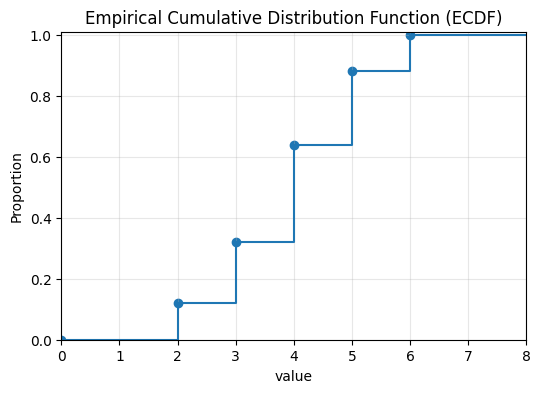

In [146]:
plt.figure(figsize=(6,4))
plt.step(df_plot.value, df_plot.edf, where='post')
plt.scatter(df_plot.value, df_plot.edf)
plt.title('Empirical Cumulative Distribution Function (ECDF)')
plt.xlabel('value')
plt.ylabel('Proportion')
plt.grid(True, alpha=0.3)
plt.xlim(0, 8)
plt.ylim(0, 1.01)
plt.show()


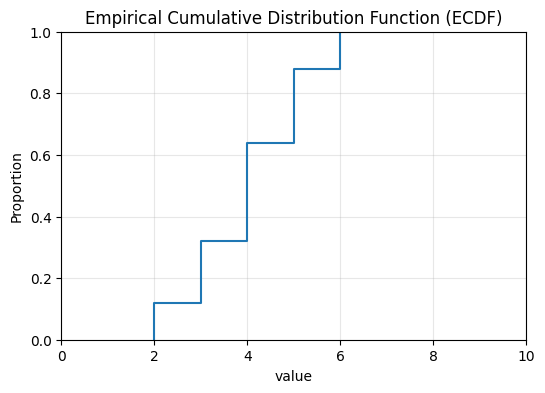

In [147]:
# embedded seaborn function
plt.figure(figsize=(6,4))
sns.ecdfplot(data=df, x="value")
plt.title("Empirical Cumulative Distribution Function (ECDF)")
plt.grid(True, alpha=0.3)
plt.xlim(0, 10)
plt.ylim(0, 1)
plt.show()

Example 5

In [151]:
x_i = np.array([-2, 1.5, 5, 7])
n_i = np.array([12, 8, 20, 10])
n = sum(n_i)
w_i = n_i / n
cum_freq = np.cumsum(w_i)

x = np.insert(x_i, 0, x_i[0])
y = np.insert(cum_freq, 0, 0)

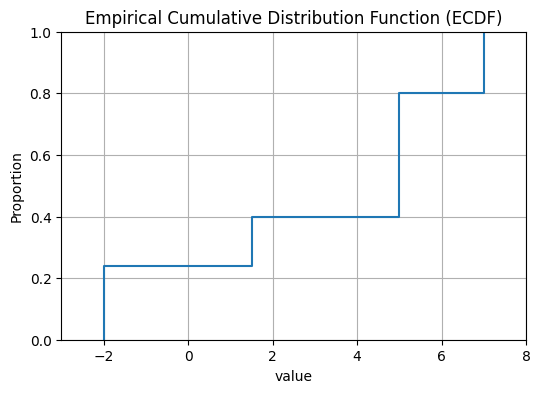

In [156]:
plt.figure(figsize=(6, 4))
plt.step(x, y, where='post')  
plt.title('Empirical Cumulative Distribution Function (ECDF)')
plt.xlabel('value')
plt.ylabel('Proportion')
plt.xlim(x_i.min()-1, x_i.max()+1)
plt.ylim(0, 1)
plt.grid(True)
plt.show()


### Paragraph 3